# Final Project - Analysis of Economic Inequality by Gender

## By Elza Contiero

**Sources:**

**Working women: What determines female labor force participation?** (2022) https://ourworldindata.org/women-in-the-labor-force-determinants

https://ourworldindata.org/grapher/women-in-informal-employment-as-share-of-female-employment

https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS?end=2021&start=1990&view=chart



----

# Female-to-male ratio of devouted unpaid care work, 2014

Unpaid care work refers to all unpaid services provided within a household for its members, including care of persons, housework and voluntary community work.



In [71]:
import csv 

class ETLFemaleToMaleRatio:
    
    data = []
    
    def __init__(self, file_name='female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv'):
        self.file_name = file_name
        
    def load(self):
        with open(self.file_name) as f:
            reader = csv.reader(f)
            self.header = next(reader) # Throw away 1st line as it is a header
            for row in reader:
                country = row[0]
                ratio = float(row[3])
                self.data.append( (country, ratio) )
                
    def get_data(self):
        return self.data
        
ftmr = ETLFemaleToMaleRatio()
ftmr.load()


In 2014, **in most countries female would work more in unpaid care work than men**. The actual proportion varies across countries.

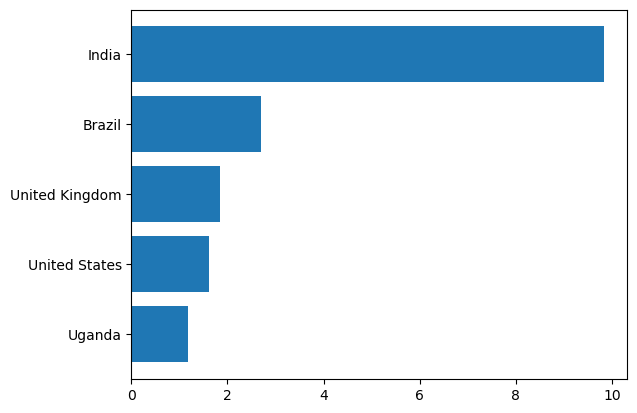

In [72]:
import matplotlib.pyplot as plot
import numpy as np

# Sort by the highest proportion on the top
data = sorted(ftmr.get_data(), key=lambda x: x[1]) # x: a tuple (a record) in the data, x[1] is ratio
# 
selected_countries = {"United States", "Uganda", "Brazil", "United Kingdom", "India"}
# Split the data in two lists, filtering by selected countries. 
countries = [x[0] for x in data if x[0] in selected_countries]
ratio = [x[1] for x in data if x[0] in selected_countries] 

p = plot.barh(countries, ratio)
# print(data)

# Gender ratios for average years of schooling, 1870 to 2010

In file `gender-ratios-for-mean-years-of-schooling.csv`.

Female-to-male ratio of the average number of years people aged 15-64 participated in formal education, expressed in
percents. Regional estimates are population-weighted averages.


In [73]:
class ETLGenderRatioSchooling:
    data = []
    
    def __init__(self, file_name='gender-ratios-for-mean-years-of-schooling.csv'):
        self.file_name = file_name
        
    def load(self):
        with open(self.file_name) as f:
            reader = csv.reader(f)
            self.header = next(reader) # Throw away 1st line as it is a header
            for row in reader:
                country = row[0]
                year = row[2]
                ratio = row[3]
                self.data.append((country, int(year), float(ratio)))
                
    def get_data(self):
        return self.data

gender_ratio_schooling = ETLGenderRatioSchooling()
gender_ratio_schooling.load()
# print(gender_ratio_schooling.get_data())

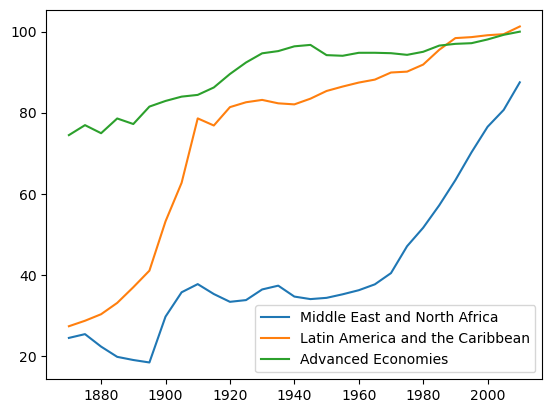

In [74]:
data = gender_ratio_schooling.get_data()

middle_east_label = 'Middle East and North Africa'
years = [row[1] for row in data if row[0]==middle_east_label]
middle_east_north_africa = [ row[2] for row in data if row[0]==middle_east_label]

latin_america_label='Latin America and the Caribbean'
latin_america = [ row[2] for row in data if row[0]==latin_america_label]

advanced_economies_label = 'Advanced Economies'
advanced_economies = [ row[2] for row in data if row[0]==advanced_economies_label]

# print(years)
# print(middle_east_north_africa)
plot.plot(years, middle_east_north_africa, label=middle_east_label)
plot.plot(years, latin_america, label=latin_america_label)
plot.plot(years, advanced_economies, label=advanced_economies_label)

plot.legend()
plot.show()

# Women in informal employment as share of female employment



In [75]:
class ETLInformalAsShare:
    data = []
    def __init__(self, file_name='women-in-informal-employment-as-share-of-female-employment.csv'):
        self.file_name = file_name
    def load(self):
        with open(self.file_name) as f:
            reader = csv.reader(f)
            self.header = next(reader) # Throw away 1st line as it is a header
            for row in reader:
                country = row[0]
                year = int(row[2])
                ratio = float(row[3])
                self.data.append((country, year, ratio))
                
    def get_data(self):
        return self.data

informal_as_share = ETLInformalAsShare()
informal_as_share.load()
# print(informal_as_share.get_data())

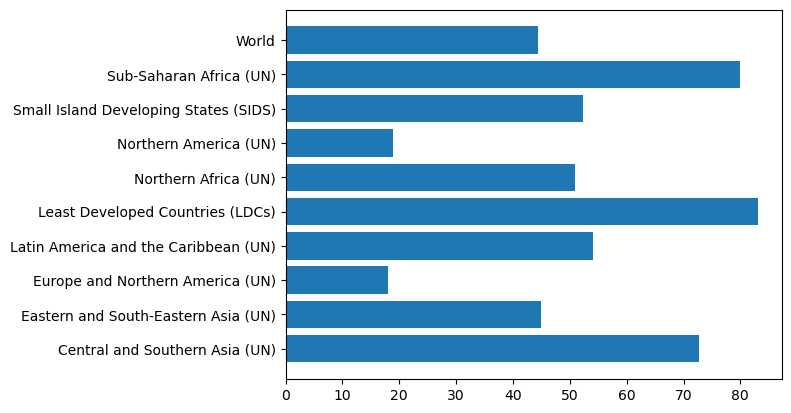

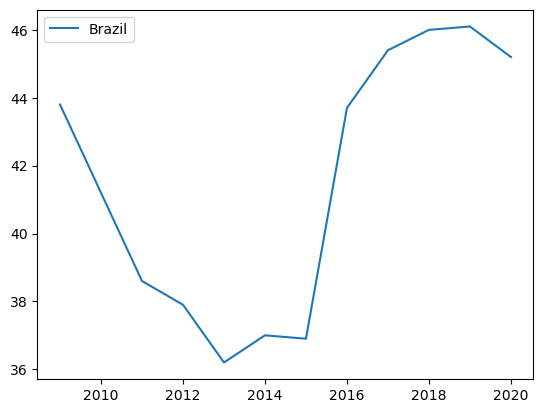

In [78]:
# By economic group
data = informal_as_share.get_data()
countries = ['Central and Southern Asia (UN)', 
            'Eastern and South-Eastern Asia (UN)',
            'Europe and Northern America (UN)',
            'Latin America and the Caribbean (UN)',
            'Least Developed Countries (LDCs)',
            'Northern Africa (UN)',
            'Northern America (UN)',
            'Small Island Developing States (SIDS)',
            'Sub-Saharan Africa (UN)',
            'World']

ratio = [row[2] for row in data if row[0] in countries]
plot.barh(countries, ratio)
plot.show()

# Just a few countries over time:
countries = ["Brazil", ]
data = informal_as_share.get_data()
# print(data)
for country in countries:
    years = [row[1] for row in data if row[0]==country]
    ratio = [row[2] for row in data if row[0]==country]
    plot.plot(years, ratio, label=country)
plot.legend()
plot.show()


# Participation of women in workforce

Total in the world, 2021.

https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS?end=2021&start=1990&view=chart 


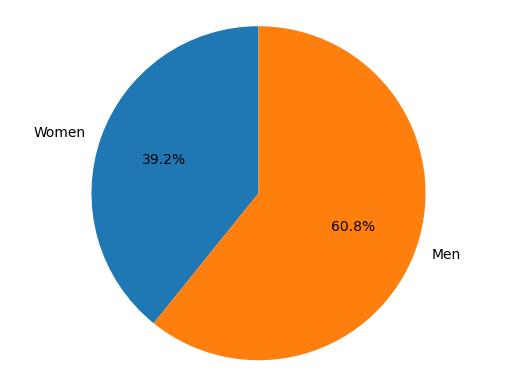

In [79]:
data = [39.2, 100.0-39.2]
labels = 'Women', 'Men'
fig1, ax1 = plot.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plot.show()

## References

1. Working women: What determines female labor force participation? (2022) https://ourworldindata.org/women-in-the-labor-force-determinants 
